<a href="https://colab.research.google.com/github/alzaidawi/PORTAL_code/blob/main/CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code CNN for classifying the pores images (Version 1)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 360, 360, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 360, 360, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 180, 180, 32)     0         
 2D)                                                             
                                                                 
 batch_normalization_8 (Batc  (None, 180, 180, 32)     128       
 hNormalization)                                                 
                                                                 
 dropout_8 (Dropout)         (None, 180, 180, 32)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 180, 180, 32)      9248

'\nfrom keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout\nfrom keras.models import Sequential\n\nmodel = None\nmodel = Sequential()\nmodel.add(Convolution2D(32, (3, 3), input_shape = (SIZE, SIZE, 3), activation = \'relu\', data_format=\'channels_last\'))\nmodel.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))\nmodel.add(BatchNormalization(axis = -1))\nmodel.add(Dropout(0.2))\nmodel.add(Convolution2D(32, (3, 3), activation = \'relu\'))\nmodel.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))\nmodel.add(BatchNormalization(axis = -1))\nmodel.add(Dropout(0.2))\nmodel.add(Flatten())\nmodel.add(Dense(activation = \'relu\', units=512))\nmodel.add(BatchNormalization(axis = -1))\nmodel.add(Dropout(0.2))\nmodel.add(Dense(activation = \'relu\', units=256))\nmodel.add(BatchNormalization(axis = -1))\nmodel.add(Dropout(0.2))\nmodel.add(Dense(activation = \'sigmoid\', units=2))\nmodel.compile(optimizer = \'adam\', loss = \

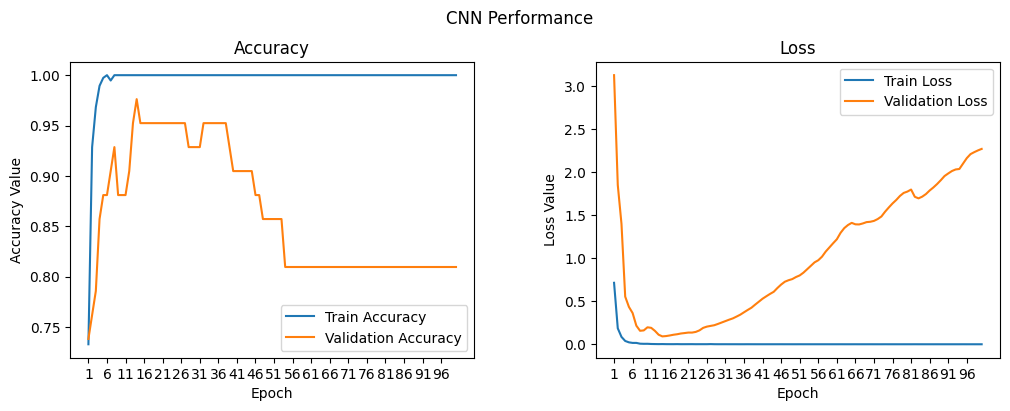

In [5]:
"""
https://www.youtube.com/watch?v=LvqzKr-dORQ&t=604s
https://www.youtube.com/watch?v=R9PPxpzj5tI&t=264s

"""

import numpy as np

#Set the `numpy` pseudo-random generator at a fixed value
#This helps with repeatable results everytime you run the code.
np.random.seed(1000)

import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
import keras

os.environ['KERAS_BACKEND'] = 'tensorflow' # Added to set the backend as Tensorflow
#We can also set it to Theano if we want.


#Iterate through all images in Parasitized folder, resize to 64 x 64
#Then save as numpy array with name 'dataset'
#Set the label to this as 0

image_directory = '/content/extracted_files/three_pore_typs'
SIZE = 360
dataset = []
label = []  #Place holders to define add labels

Keyhole_images = os.listdir(image_directory + '/Keyhole/')
for i, image_name in enumerate(Keyhole_images):    #Remember enumerate method adds a counter and returns the enumerate object

    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + '/Keyhole/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

#Iterate through all images in LoF folder, resize to 64 x 64
#Then save into the same numpy array 'dataset' but with label 1

LoF_images = os.listdir(image_directory + '/LoF/')
for i, image_name in enumerate(LoF_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + '/LoF/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

process_images = os.listdir(image_directory + '/process/')
for i, image_name in enumerate(process_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + '/process/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(2)
#Apply CNN
### Build the model

#############################################################
###2 conv and pool layers. with some normalization and drops in between.

INPUT_SHAPE = (SIZE, SIZE, 3)   #change to (SIZE, SIZE, 3)
inp = keras.layers.Input(shape=INPUT_SHAPE)

conv1 = keras.layers.Conv2D(32, kernel_size=(3, 3),
                               activation='relu', padding='same')(inp)
pool1 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)
norm1 = keras.layers.BatchNormalization(axis = -1)(pool1)
drop1 = keras.layers.Dropout(rate=0.2)(norm1)
conv2 = keras.layers.Conv2D(32, kernel_size=(3, 3),
                               activation='relu', padding='same')(drop1)
pool2 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)
norm2 = keras.layers.BatchNormalization(axis = -1)(pool2)
drop2 = keras.layers.Dropout(rate=0.2)(norm2)

flat = keras.layers.Flatten()(drop2)  #Flatten the matrix to get it ready for dense.

hidden1 = keras.layers.Dense(512, activation='relu')(flat)
norm3 = keras.layers.BatchNormalization(axis = -1)(hidden1)
drop3 = keras.layers.Dropout(rate=0.2)(norm3)
hidden2 = keras.layers.Dense(256, activation='relu')(drop3)
norm4 = keras.layers.BatchNormalization(axis = -1)(hidden2)
drop4 = keras.layers.Dropout(rate=0.2)(norm4)

out = keras.layers.Dense(3, activation='sigmoid')(drop4)   #units=1 gives error

model = keras.Model(inputs=inp, outputs=out)
model.compile(optimizer='adam',
                loss='categorical_crossentropy',   #Check between binary_crossentropy and categorical_crossentropy
                metrics=['accuracy'])
print(model.summary())

###############################################################

 ### Split the dataset
#
# I split the dataset into training and testing dataset.
# 1. Training data: 70%
# 2. Testing data: 30%
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(label)), test_size = 0.30, random_state = 0)

# When training with Keras's Model.fit(), adding the tf.keras.callback.TensorBoard callback
# ensures that logs are created and stored. Additionally, enable histogram computation
#every epoch with histogram_freq=1 (this is off by default)
#Place the logs in a timestamped subdirectory to allow easy selection of different training runs.

#import datetime
#log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d_%H%M%S") + "/"
#tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


# ### Training the model
#Fit the model
history = model.fit(np.array(X_train),
                         y_train,
                         batch_size = 64,
                         verbose = 1,
                         epochs = 100,      #Changed to 3 from 50 for testing purposes.
                         validation_split = 0.1,
                         shuffle = False
                      #   callbacks=callbacks
                     )

# ## Accuracy calculation
# calculate the accuracy on the test data.

print("Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(X_test), np.array(y_test))[1]*100))




f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")


#Save the model
model.save('malaria_cnn.h5')

################################################
### ANOTHER WAY TO DEFINE THE NETWORK using Sequential model
#Sequential
#You can create a Sequential model by passing a list of layer instances to the constructor:
"""
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Sequential

model = None
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape = (SIZE, SIZE, 3), activation = 'relu', data_format='channels_last'))
model.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Convolution2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(activation = 'relu', units=512))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Dense(activation = 'relu', units=256))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Dense(activation = 'sigmoid', units=2))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(model.summary())

"""



# Code CNN for classifying the pores images (Version 2)

# Unzipping the dataset

In [1]:
import zipfile
import os

# Step 1: Specify the path of the zip file
zip_file_path = "/content/three_pore_typs.zip"

# Step 2: Provide the directory where you want to extract the contents
destination_folder = "/content/extracted_files"

# Step 3: Create the destination folder if it doesn't exist
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Step 4: Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

print("Extraction completed successfully.")

Extraction completed successfully.


# CNN Model

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras import regularizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

# Define the learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch < 50:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Define the image data generator with data augmentation
datagen = ImageDataGenerator(
    rescale=1./360,
    rotation_range=30,
    zoom_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.3  # 30% of the data will be used for validation
)

# Define the image size and batch size
img_size = (360, 360)
batch_size = 32

# Prepare the training dataset
train_generator = datagen.flow_from_directory(
    '/content/extracted_files/three_pore_typs',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Prepare the validation dataset
val_generator = datagen.flow_from_directory(
    '/content/extracted_files/three_pore_typs',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Define the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='loss', patience=10)  # Monitor 'loss' instead of 'val_loss'

# Define the learning rate scheduler callback
lr_scheduler_callback = LearningRateScheduler(lr_scheduler)

# Train the model with early stopping and learning rate scheduler
history = model.fit(train_generator, validation_data=val_generator, epochs=100, callbacks=[early_stopping, lr_scheduler_callback])

# Evaluate the model
model.evaluate(val_generator)


Found 420 images belonging to 3 classes.
Found 180 images belonging to 3 classes.
Epoch 1/100
14/14 [==============================] - 162s 11s/step - loss: 4.3030 - accuracy: 0.4857 - val_loss: 3.0892 - val_accuracy: 0.6889 - lr: 0.0010
Epoch 2/100
14/14 [==============================] - 159s 11s/step - loss: 2.8474 - accuracy: 0.6452 - val_loss: 2.3700 - val_accuracy: 0.7167 - lr: 0.0010
Epoch 3/100
14/14 [==============================] - 177s 13s/step - loss: 2.3695 - accuracy: 0.6929 - val_loss: 2.1265 - val_accuracy: 0.7333 - lr: 0.0010
Epoch 4/100
14/14 [==============================] - 157s 11s/step - loss: 2.1787 - accuracy: 0.6714 - val_loss: 1.9075 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 5/100
14/14 [==============================] - 157s 11s/step - loss: 1.8740 - accuracy: 0.6786 - val_loss: 1.6568 - val_accuracy: 0.7389 - lr: 0.0010
Epoch 6/100
14/14 [==============================] - 159s 11s/step - loss: 1.7530 - accuracy: 0.6619 - val_loss: 1.5719 - val_accuracy: 0.

[0.27514082193374634, 0.9833333492279053]

In [5]:
# Save the trained model
model.save("/content/CNN.h5")

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    sns.lineplot(x=range(len(history.history['accuracy'])), y=history.history['accuracy'], label='Training Accuracy')
    sns.lineplot(x=range(len(history.history['val_accuracy'])), y=history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    sns.lineplot(x=range(len(history.history['loss'])), y=history.history['loss'], label='Training Loss')
    sns.lineplot(x=range(len(history.history['val_loss'])), y=history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

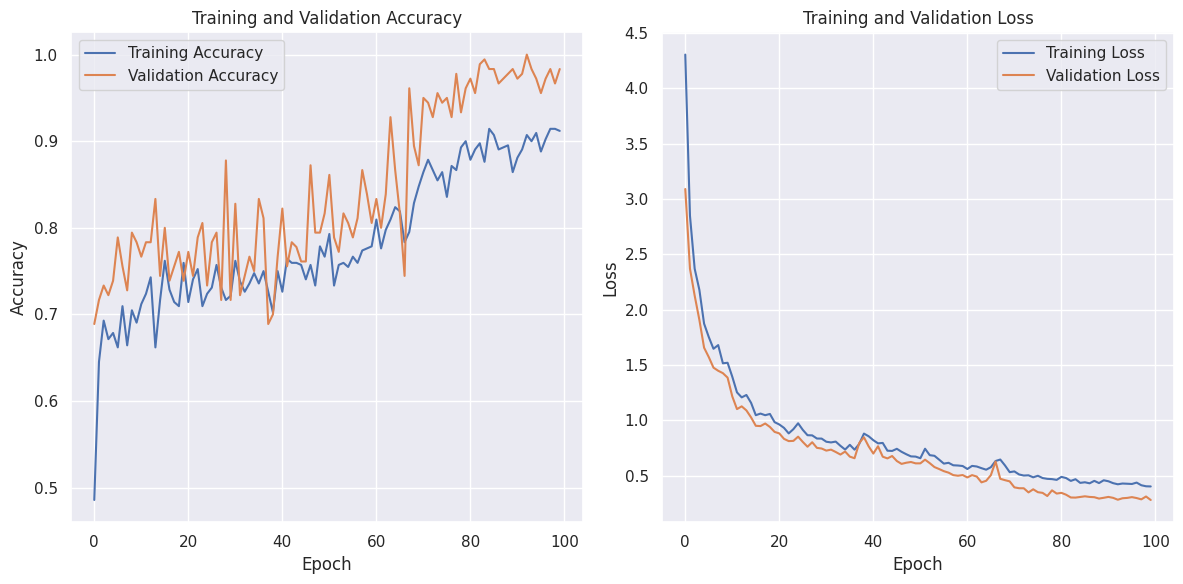

In [8]:
plot_training_history(history)

In [ ]:
# Load the model
model = tf.keras.models.load_model("/content/CNN.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 358, 358, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 179, 179, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 177, 177, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 88, 88, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 86, 86, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 43, 43, 128)      0

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def preprocess_image(image_path, target_size):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

def predict_image_class(image_path, target_size, model, class_labels):
    preprocessed_image = preprocess_image(image_path, target_size)

    # Make predictions
    predictions = model.predict(preprocessed_image)

    # Get the predicted class index (the class with the highest probability)
    predicted_class_index = np.argmax(predictions[0])

    # Map the class index to the corresponding class label
    predicted_class_label = list(class_labels.keys())[list(class_labels.values()).index(predicted_class_index)]

    return predicted_class_label

if __name__ == "__main__":
    new_image_path = input("/content/601_80.jpg")
    input_size = (360, 360)
    # Replace 'model' and 'train_generator.class_indices' with your actual model and class indices dictionary
    predicted_class = predict_image_class(new_image_path, input_size, model, train_generator.class_indices)
    print("Predicted Class Label:", predicted_class)


#TODO NEXT:
1. how to use the saved model to predict new images
2.why the mask having different colors?

# simple CNN

#**CNN for Pixel segmentation**

In [2]:
# Importing Libraries
import zipfile
import os
from PIL import Image
import numpy as np
from skimage import img_as_ubyte
from scipy.spatial.distance import cdist
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Reshape, Softmax
import matplotlib.pyplot as plt

# Unzipping and Defining Directories

In [6]:
# Unzipping and Defining Directories
zip_path = '/content/data.zip'
unzip_dir = '/content'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)
data_dir = os.path.join(unzip_dir, 'data')
train_dir = os.path.join(data_dir, 'train')
masks_dir = os.path.join(data_dir, 'masks')
test_dir = os.path.join(data_dir, 'test')
test_masks_dir = os.path.join(data_dir, 'test mask')

# Mapping of RGB Colors to Class Labels and Conversion Function

In [7]:
# Mapping of RGB colors to class labels
class_colors = np.array([
    [0, 0, 0],    # Black
    [255, 0, 0],  # Red
    [0, 255, 0],  # Green
    [0, 0, 255]   # Blue
])

# Function to convert mask image to class labels
def convert_mask_to_labels(mask_image):
    mask_labels = np.zeros(mask_image.shape[:2], dtype=np.uint8)
    for i in range(mask_image.shape[0]):
        for j in range(mask_image.shape[1]):
            distances = cdist([mask_image[i, j]], class_colors, 'euclidean')
            class_label = np.argmin(distances)
            mask_labels[i, j] = class_label
    return mask_labels

# Loading Images and Masks

In [8]:
# Loading images and masks
def load_images_and_masks(image_dir, mask_dir, is_test=False):
    images = []
    masks = []
    for image_name in tqdm(os.listdir(image_dir)):
      image_path = os.path.join(image_dir, image_name)
      if image_path != '/content/data/train/.ipynb_checkpoints' and  image_path != '/content/data/test/.ipynb_checkpoints':
        mask_name = "test_mask.JPG" if is_test else "mask" + image_name[5:]
        mask_path = os.path.join(mask_dir, mask_name)

        # Load image and mask
        image = Image.open(image_path)
        mask_image = Image.open(mask_path)

        # Convert mask image to class labels
        mask_labels = convert_mask_to_labels(np.array(mask_image))

        images.append(img_as_ubyte(image))
        masks.append(mask_labels)

    return np.array(images), np.array(masks)



# Loading Training and Test Datasets

In [9]:
# Loading training and test datasets
train_images, train_masks = load_images_and_masks(train_dir, masks_dir)
test_images, test_masks = load_images_and_masks(test_dir, test_masks_dir, is_test=True)

100%|██████████| 2/2 [00:09<00:00,  4.82s/it]


# Building the CNN Model

# Reshaping Masks for Training and Training the Model

In [16]:
import numpy as np
import cv2
from tensorflow.keras.layers import Activation, Conv2D, Conv2DTranspose, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as K

# Custom Softmax Function at Pixel Level
def pixelwise_softmax(x):
    e = K.exp(x - K.max(x, axis=-1, keepdims=True))
    s = K.sum(e, axis=-1, keepdims=True)
    return e / s

# Updated function to build the CNN model
def build_simple_cnn(input_shape, num_classes):
    model = Sequential([
        Conv2D(4, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 2), padding='same'),
        Conv2D(4, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), padding='same'),
        Conv2DTranspose(4, (3, 3), activation='relu', padding='same', strides=(2, 2)),
        Conv2DTranspose(4, (3, 3), activation='relu', padding='same', strides=(2, 2)),
        # Conv2D(num_classes, (3, 3), padding='same'),
        Activation(pixelwise_softmax)  # Applying custom softmax activation
    ])

    return model

# # Updated function to build the CNN model
# def build_simple_cnn(input_shape, num_classes):
#   model = Sequential()
#   model.add(Conv2D(4, (3, 3), activation='relu', input_shape=(128, 128, 3)))
#   model.add(MaxPooling2D((2, 2)))
#   model.add(Conv2D(4, (3, 3), activation='relu'))
#   model.add(MaxPooling2D((2, 2)))
#   model.add(Flatten())
#   model.add(Dense(num_classes))
#   model.add(Softmax())
#   return model

# Define your input shape and number of classes
input_shape = (992, 1060, 3)
num_classes = 4

# Build and compile the corrected model
simple_cnn_model = build_simple_cnn(input_shape, num_classes)
simple_cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resize the data to match the input dimensions of the model
desired_shape = (1060, 992)  # Adjust the shape for resizing
resized_train_images = np.array([cv2.resize(img, desired_shape) for img in train_images])
resized_train_masks = np.array([cv2.resize(mask, desired_shape) for mask in train_masks])

# Training the Model
simple_cnn_model.fit(resized_train_images, resized_train_masks, epochs=5)


Epoch 1/5
1/1 [==============================] - 4s 4s/step - loss: 10.4764 - accuracy: 0.1908
Epoch 2/5
1/1 [==============================] - 2s 2s/step - loss: 10.1793 - accuracy: 0.1908
Epoch 3/5
1/1 [==============================] - 4s 4s/step - loss: 9.8764 - accuracy: 0.1910
Epoch 4/5
1/1 [==============================] - 4s 4s/step - loss: 9.5629 - accuracy: 0.1917
Epoch 5/5
1/1 [==============================] - 3s 3s/step - loss: 9.2638 - accuracy: 0.1922


# Predicting on Test Data

1/1 [==============================] - 1s 965ms/step


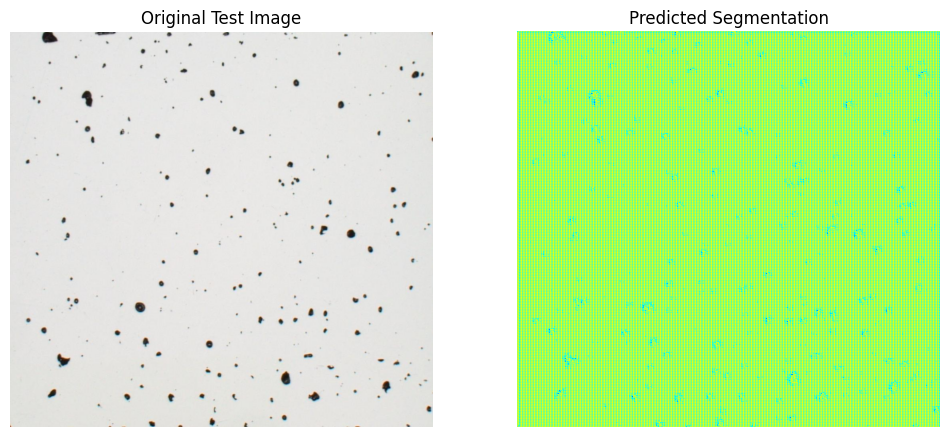

In [17]:
# Resize the test images to match the input dimensions of the model
desired_shape = (1060, 992)  # Adjust the shape for resizing
resized_test_images = np.array([cv2.resize(img, desired_shape) for img in test_images])

# Predict on the resized test images
test_predictions = simple_cnn_model.predict(resized_test_images)
test_predictions = np.argmax(test_predictions, axis=-1).reshape(resized_test_images.shape[0], *resized_test_images.shape[1:3])

# Plotting Original and Predicted Images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(test_images[0])
ax[0].set_title("Original Test Image")
ax[0].axis('off')
ax[1].imshow(test_predictions[0], cmap='jet')
ax[1].set_title("Predicted Segmentation")
ax[1].axis('off')
plt.show()


In [18]:
print("Shape of train_images:", train_images.shape)
print("Shape of train_masks_reshaped:", train_masks.shape)

# Print model summary
simple_cnn_model.summary()


Shape of train_images: (2, 990, 1060, 3)
Shape of train_masks_reshaped: (2, 990, 1060)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 992, 1060, 4)      112       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 496, 530, 4)      0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 496, 530, 4)       148       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 248, 265, 4)      0         
 g2D)                                                            
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 496, 530, 4)      148       
 ranspose)                       

un-compelete Code for fixing colors on mask images

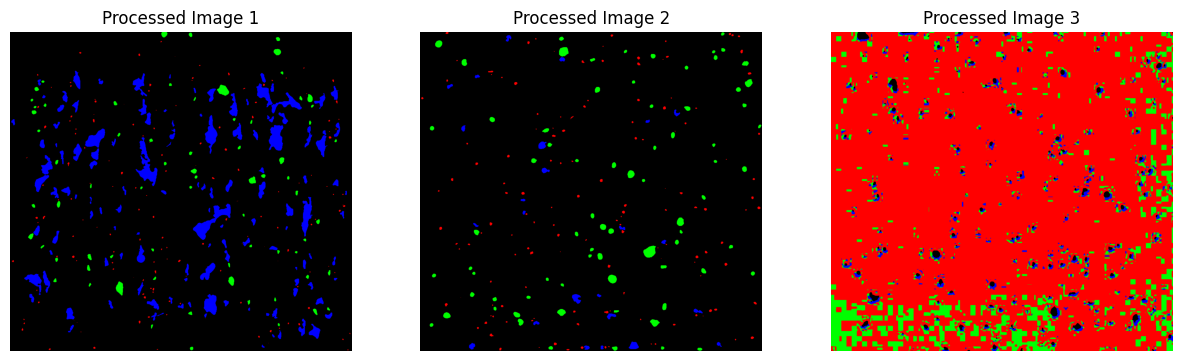

In [19]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Loading the images
mask1_image = Image.open('/content/data/masks/mask1.JPG')
mask2_image = Image.open('/content/data/masks/mask2.JPG')
test_mask_image = Image.open('/content/data/test/test_image.JPG')


# Define the target colors
colors = {
    'black': [0, 0, 0],
    'red': [255, 0, 0],
    'green': [0, 255, 0],
    'blue': [0, 0, 255]
}

# Function to find the closest color
def closest_color(pixel):
    min_distance = float('inf')
    closest_color = None
    for color_name, color_value in colors.items():
        distance = np.linalg.norm(np.array(pixel) - np.array(color_value))
        if distance < min_distance:
            min_distance = distance
            closest_color = color_value
    return tuple(closest_color)

# Function to process the image
def process_image(image):
    processed_image = image.convert('RGB')
    pixels = processed_image.load()
    for i in range(processed_image.width):
        for j in range(processed_image.height):
            pixels[i, j] = closest_color(pixels[i, j])
    return processed_image

# Process the images
processed_mask1_image = process_image(mask1_image)
processed_mask2_image = process_image(mask2_image)
processed_test_mask_image = process_image(test_mask_image)

# Display the processed images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(processed_mask1_image)
axes[0].set_title('Processed Image 1')
axes[0].axis('off')

axes[1].imshow(processed_mask2_image)
axes[1].set_title('Processed Image 2')
axes[1].axis('off')

axes[2].imshow(processed_test_mask_image)
axes[2].set_title('Processed Image 3')
axes[2].axis('off')

plt.show()


In [ ]:
import numpy as np
import cv2

image_path = '/content/masks/001.JPG'
original_mask = np.array(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE))  # Convert to grayscale

# Color mappings
class_colors = {
    0: [0, 0, 0],    # Black
    1: [255, 0, 0],  # Red
    2: [0, 255, 0],  # Green
    3: [0, 0, 255]   # Blue
}
csv_file = 'new_mask_output.csv'
# Create a new mask with the specified color mappings
new_mask = np.zeros((original_mask.shape[0], original_mask.shape[1], 3), dtype=np.uint8)

for class_idx, color in class_colors.items():
    class_pixels = original_mask == class_idx
    new_mask[class_pixels] = color

print(new_mask)
with open(csv_file, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(["Pixel Value"])
    for value in new_mask:
        csv_writer.writerow([value])

print("CSV file generated successfully.")